In [1]:
from argparse import ArgumentParser
import sys
sys.path.append("/home/dolo/dev/lmtd_simulator/")
import numpy as np
import matplotlib.pyplot as plt
from CoolProp.CoolProp import PropsSI

In [2]:
from lmtd_simulator import Simulator
from constants import constants


In [3]:
parser = ArgumentParser()
parser.add_argument("-n", "--n_segments", type=int, default=100)
parser.add_argument("-v", "--verbose", type=int, default=2)
parser.add_argument("-d", "--max_depth", type=int, default=20)


_StoreAction(option_strings=['-d', '--max_depth'], dest='max_depth', nargs=None, const=None, default=20, type=<class 'int'>, choices=None, required=False, help=None, metavar=None)

In [4]:
h1 = PropsSI("H", "P",8e6, "T", 72.83 + 273.15, "CO2")
h2 = PropsSI("H", "P",7.48e6, "T", 33 + 273.15, "CO2")
(h1-h2)

97393.54226574459

In [5]:
def main():
    n_segments = 100
    verbose = 3
    max_depth = 20
    simulator = Simulator()
    print(constants.t_air_inlet)
    simulator.run(constants.t_co2_outlet, constants.t_air_inlet, max_segments=n_segments, verbose=verbose)
    return simulator

In [6]:
simulator = main()

298.15
Initial conditions:
t_co2_in: 306.15 t_air_in: 298.15
here
air too hot
here
air too hot
here
air too hot
here
air too hot
here
air too hot
here
air too hot
here
air too hot
here
air too hot
here
2.7488044062606996
OHTC 3.8481279981120133
t_co2_out: 306.22779296875, t_air_out: 305.63410905674635, q_co2: 3076.5089526620095, q_htc: 274.88044062606997
here
5.926716308767544
OHTC 3.8481279981120133
t_co2_out: 306.188896484375, t_air_out: 301.92847715664163, q_co2: 1553.22680518108, q_htc: 592.6716308767544
here
7.0168050201807315
OHTC 3.8481279981120133
t_co2_out: 306.1694482421875, t_air_out: 300.04856657817925, q_co2: 780.4478837368398, q_htc: 701.6805020180732
here
7.51879930969404
OHTC 3.8481279981120133
t_co2_out: 306.15972412109375, t_air_out: 299.10164401860146, q_co2: 391.19437207233455, q_htc: 751.879930969404
here
7.270686856707886
OHTC 3.8481279981120133
t_co2_out: 306.16458618164063, t_air_out: 299.5756918463319, q_co2: 586.0622414398888, q_htc: 727.0686856707887
here
7.1

In [7]:
t_co2 = simulator.temps['t_co2']
t_air = simulator.temps['t_air']
m_plot = np.zeros((len(t_co2),3))
m_plot[:,0] = constants.t_air_inlet
m_plot[:,1] = t_co2
m_plot[:,2] = t_air
m_plot = m_plot.astype(int)

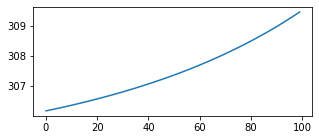

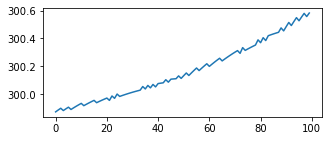

In [8]:
plt.figure(figsize=(5,2))
plt.plot(t_co2)
plt.figure(figsize=(5,2))
plt.plot(t_air)

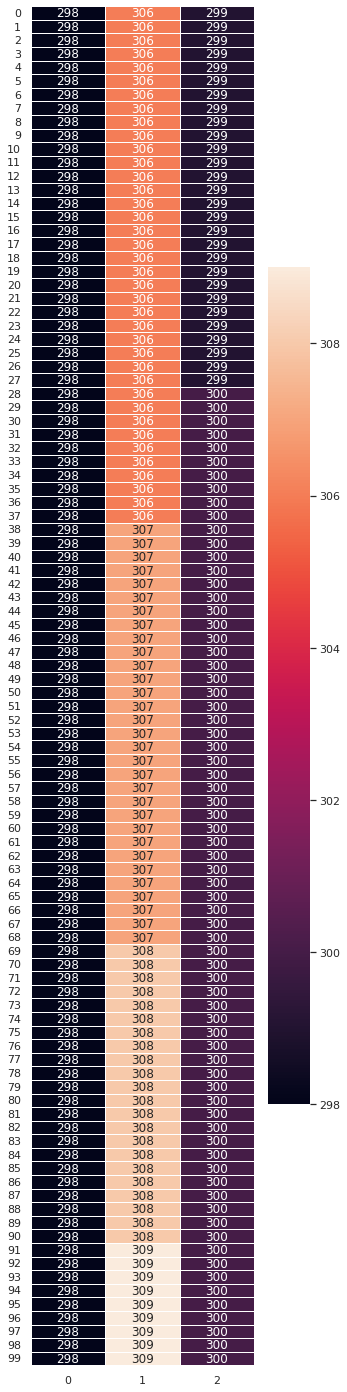

In [9]:
import seaborn as sns
sns.set(rc={'figure.figsize':(5,25)})
sns.set_theme()
ax = sns.heatmap(m_plot, annot=True,linewidths=.5,fmt="d")